# Desafio Final Imersão Alura

## Introdução


Drug Discover [1] pode ser descrita como o processo de identificação de entidades químicas com potencial para se tornarem agentes terapêuticos. Um objetivo principal das campanhas de descoberta de medicamentos é o reconhecimento de novas entidades moleculares que podem ser valiosas no tratamento de doenças que se qualificam como apresentando necessidades médicas não atendidas. Essas doenças não têm terapias definitivamente úteis e são real ou potencialmente fatais. Os medicamentos comercializados neste momento representam um número relativamente pequeno de tipos-alvo de medicamentos. Os medicamentos direcionados contra os receptores acoplados à proteína G, os receptores nucleares (hormonais) e os canais iônicos representam um pouco menos de 50% dos medicamentos comercializados. De longe, os medicamentos dirigidos contra enzimas representam a maior parte dos medicamentos comercializados. A expansão para novos tipos de alvos de drogas pode ser necessária para preencher certos vazios terapêuticos, mas uma questão de grande desafio intelectual é como escolher um alvo que provavelmente tenha valor, especialmente ao se aventurar em tipos menos explorados de alvos de drogas.

O processo de pesquisa e desenvolvimento farmacêutico tradicional sofre com uma alta taxa de desgaste. Para cada nova droga lançada no mercado, a maioria das estimativas sugere que os pesquisadores normalmente terão empregado mais de 100 triagens procurando pistas de drogas, separando candidatos de dezenas de milhares de compostos, conforme a figura mostrada abaixo.

<center><img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780123854711000301-f30-01-9780123854711.jpg" align="center"></center>

E é neste contexto que a Ciência de Dados se faz presente. Com ela podemos economizar recursos e agilizar o processo através da automação para que novos compostos possam ser identificados, podendo tornar-se remédio.




## Importações

In [96]:
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt
import seaborn              as sns


from random                 import sample




import warnings


In [97]:
warnings.filterwarnings('ignore')

Os dados utilizados neste projeto foram fornecido pela Alura durante a Imersão Dados. Os dados podem ser encontrados neste [link](https://github.com/alura-cursos/imersao-dados-desafio-final/tree/main/Dados).

A origem dos dados é da competição *Mechanisms of Action (MoA) Prediction* que pode ser encontrada no site Kaggle, fornecido pelo Connectivity Map, um projeto da Broad Institute of MIT e Harvard, do LISH (Laboratory for Innovation Science at Harvard) e LINCS (NIH Common Funds Library of Integrated Network-Based Cellular Signatures). O objetivo desta competição é promover o avanço na área de drug development por meio de algoritmos de aprendizado de máquinas.

Para acessar a página da competição clique [aqui](https://www.kaggle.com/c/lish-moa)

Os arquivos fornecidos foram 2 datasets:

1. **dados_experimentos.zip** - Contém os experimentos e dados referentes a sua observação de acordo com as variáveis

| Coluna | Descrição | Valor |
| ------ | --------- | ----- |
|id| Código para identificar o experimento| `str` contendo números e letras|
|tratamento| A amostra é do grupo controle ou é um<br>experimento| `com_controle` = grupo controle <br> `com_droga` = Experimento |
|dose| Dose da droga Utilizada| `D1` = dose anônima *<br>`D2` = dose anônima *|
|tempo| Tempo decorrido do início ao realizar a<br>observação| `24` = 24 horas <br>`48` = 48 horas<br>`72` = 72 horas|
|droga| Composto utilizado no experimento |`str` contendo números e letras|
|g-x| Expressão Gênica| `float`|
|c-x| Viabilidade Celular| `float`|

2. **dados_resultados.csv** - Dataframe com o resultados para cada experimento do dataset `dados_experimentos.zip` com os mecanismos de ação ativados. A coluna `id` relaciona os experimentos aos resultados

In [98]:
dados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression='zip')
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')

O primeiro passo antes de analisarmos o dataset é verificar se há algum problema com as bases de dados

In [99]:
print('dados_experimentos.zip\n')
print(f'Quantidade de Linhas = {dados.shape[0]}')
print(f'Quantidade de Colunas = {dados.shape[1]}\n')

print('====================\n')

print('dados_resultados.csv\n')
print(f'Quantidade de Linhas = {dados_resultados.shape[0]}')
print(f'Quantidade de Colunas = {dados_resultados.shape[1]}')

dados_experimentos.zip

Quantidade de Linhas = 23814
Quantidade de Colunas = 877


dados_resultados.csv

Quantidade de Linhas = 23814
Quantidade de Colunas = 207


In [100]:
# Pega a coluna id do 2 datasets
id_dados = dados['id'].unique()
id_dados_resultados = dados_resultados['id'].unique()

# Verifica se há algum id diferente
if all(id_dados == id_dados_resultados):
    print('Todos os ids tem seu correspondente no outro dataset')
else:
    print('Há uma inconsistẽncia no dataset. Verifique!')

Todos os ids tem seu correspondente no outro dataset


A primeira verificação é para garantir que o número de linhas entre os dois datasets sao iguais.

A segunda verificação era para garantir que um id tem seu correnpondente no outro dataset

Todos as verificações se mostraram verdadeiras. Agora, será que há algum valor `NaN` (Not a Number) em nossos datasets?

Vamos verificar!

In [101]:
# Para dados_experimentais.zip
if all(dados.isna().sum() != 0):
    print('Há valor NaN')
else:
    print('Não valor NaN em dados_experimentais.zip')

# Para dados_resultados.csv
if all(dados_resultados.isna().sum() != 0):
    print('Há valor NaN')
else:
    print('Não valor NaN em dados_resultados.csv')
    

Não valor NaN em dados_experimentais.zip
Não valor NaN em dados_resultados.csv


Agora podemos analisar as colunas categóricas de `dados_experimental.zip` (tratamento, tempo, dose, droga)

In [102]:
colunas_categoricas = ['tratamento', 'tempo', 'dose', 'droga']

for coluna in colunas_categoricas:
    print(f'A coluna {coluna} possui {dados[coluna].nunique() } categorias')

A coluna tratamento possui 2 categorias
A coluna tempo possui 3 categorias
A coluna dose possui 2 categorias
A coluna droga possui 3289 categorias


Para iniciar a exploração dos dados. Que tal colocarmos uma lupa em cada uma destas variáveis?

Vamos lá?

## Análise Exploratória dos Dados

### Tratamento

#### Podemos dizer que o tipo de tratamento está dividido exatamente igual?

In [103]:
sns.set(rc={'axes.facecolor':'f6f5f5', 'figure.facecolor':'f6f5f5'})

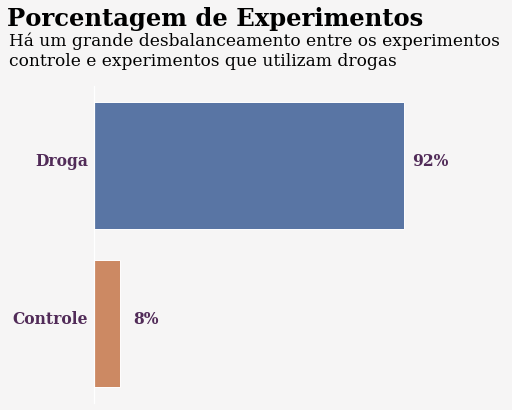

In [104]:
x = dados['tratamento'].value_counts()

fig, ax = plt.subplots(figsize = (6,6), dpi = 70)


sns.barplot(x=x.values, y=x.index, ax=ax)
plt.text(x=-4150, y=0.00, s='Droga', fontdict={'family': 'Serif',
                                                  'weight':'bold',
                                                  'Size': '16',
                                                  'style':'normal',
                                                  'color':'#512b58'})

plt.text(x=-5800, y=1.00, s='Controle', fontdict={'family': 'Serif',
                                                  'weight':'bold',
                                                  'Size': '16',
                                                  'style':'normal',
                                                  'color':'#512b58'})

plt.text(x=-6150, y=-0.88,
         s='Porcentagem de Experimentos',
         fontdict={'family': 'Serif',
                   'Size': '25',
                   'weight':'bold',
                   'color':'black'})

plt.text(x=-6000, y=-0.63,
         s='Há um grande desbalanceamento entre os experimentos \ncontrole e experimentos que utilizam drogas', 
        fontdict={'family':'Serif', 'size':'17.5','color': 'black'})


plt.text(x=22500, y=0.00, s='92%', fontdict={'family': 'Serif',
                                            'weight':'bold',
                                            'Size': '16',
                                            'style':'normal',
                                            'color':'#512b58'})

plt.text(x=2800, y=1.00, s='8%', fontdict={'family': 'Serif',
                                          'weight':'bold',
                                          'Size': '16',
                                          'style':'normal',
                                          'color':'#512b58'})



ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Neste dataset analisado, podemos ver que temos mais experimentos utilizando drogas do que como controle.

A explicação para isto é que o grupo controle pode servir para diversos experimentos que utilizam drogas.

O grupo de controle permite que visa isolar apenas uma variavel do experimento. Em nosso caso, o grupo controle éstá sob as mesmas condições de conservação, exceto que não recebeu a droga.

Um grupo de controle científico nos dá a possibilidade de avaliar uma variável por vez. Ao desenharmos os experimentos, submetemos um grupo as condições normais de funcionamento e um outro grupo mudamos apenas um aspecto. Para o primeiro grupo nós damos o nome de **grupo de controle** e para o segundo **estudo experimental**.

Cabe ressaltar que não é necessário experimentos em pares, podemos testar diferentes compostos sob as mesmas condições de um único grupo de controle

#### O que é colocado na coluna `droga` nas amostra do grupo de controle?

In [105]:
dados_controle = dados[dados['tratamento'] == 'com_controle']
print(dados_controle['droga'].unique())

['cacb2b860']


#### Se a droga utilizada é a `cacb2b860` ela tem dose diferentes?

In [106]:
dados_controle['dose'].value_counts()

D1    951
D2    915
Name: dose, dtype: int64

O grupo de controle também são divididos de acordo com a dose?

Você pode me perguntar como o grupo de controle pode ter dose se ele é exatamente a cultura de bacterias na mesma condições do experimento?

E é exatamente por essa pergunta que podemos inferir que *TALVEZ* esta droga aplicada no grupo de controle seja um placebo, algo que não ative os mecanismos de ação das amostras. 

### Tempo

#### E a variável `tempo`? É balanceada? 

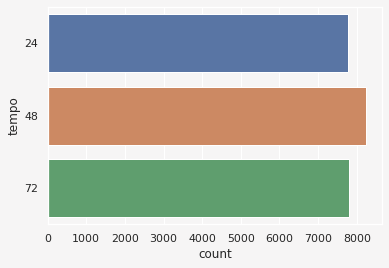

In [107]:
sns.countplot(data=dados, y='tempo')

A variável `tempo` está balanceada. Bem distribuída entre as 3 categorias (24, 48, 72). Esta observação tem sentido, pois se o experimento foi desenhado para fazer observações nestes momentos, espera-se que mais ou menos todas análises tenham sido feitas nos tempos marcados.

A feature `tempo` é tempo decorrido desde a aplicação do composto até a observação. Então se a label na variável `tempo` é 24, aqueles dados refere-se à observação 24 horas depois da aplicação do composto.

#### Eu vejo que ela não tem exatamente o mesmo número de observações o que é isso?

### Dose

#### Como está distribuída a variável `dose`?

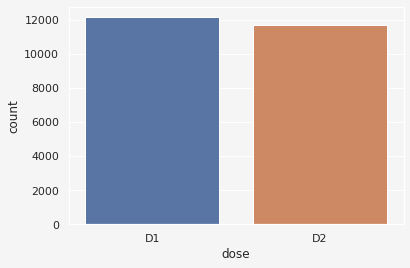

In [108]:
sns.countplot(data=dados, x='dose')

A variável `dose` refere-se a dose aplicada do composto no experimento.

O motivo de não revelarem qual dose é a maior é puramente para a eliminação de viés por quem analisa os dados. Este comportamento, de anonimizar os dados, está presente por todo dataset,

Uma outra análise que podemos fazer é sobre o número de composto da base de dados

### Drogas

#### Quantas drogas há em nosso dataset?


In [109]:
qnt_drogas = dados['droga'].nunique()
print(f'Há {qnt_drogas} em nosso dataset')

Há 3289 em nosso dataset


#### Quais são as 5 drogas mais utilizadas?

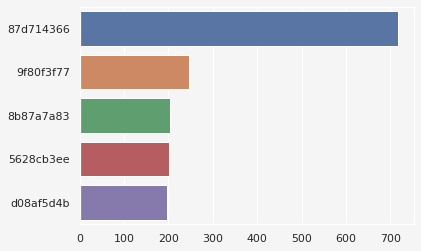

In [110]:
contagem_droga = dados['droga'].value_counts().sort_values(ascending=False)[1:6]
sns.barplot(y=contagem_droga.index, x=contagem_droga.values)

Em nosso dataset, a droga mais utilizada é o placebo utilizado no grupo de controle. Ao retirarmos este rótulo, nosso Top 5 fica

1. `87d714366`
2. `9f80f3f77`
3. `8b87a7a83`
4. `5628cb3ee`
5. `d08af5d4b`

Aposto que você está se perguntando quais são estas drogas?

Mais uma vez aquele padrão de anonimizar os dados para evitar viés por parte de quem os analisa.

#### As mesmas drogas ativam mecanismos de ação diferentes?

### Mecanismos de Ação

In [111]:
dados_resultados['moa_ativados'] = ''

for col_name in dados_resultados.columns:
    dados_resultados.loc[dados_resultados[col_name] == 1, 'moa_ativados'] = dados_resultados['moa_ativados'] + ' | ' + col_name

dados_resultados['moa_ativados'] = dados_resultados['moa_ativados'].str.lstrip('| ')

In [112]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,moa_ativados,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,gsk_inhibitor,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bcr-abl_inhibitor | kit_inhibitor | pdgfr_inhi...,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,calcium_channel_blocker,1,True


#### Quantos Mecanismos de ação há em nosso dataset

In [113]:
qnt_moa = len(dados_resultados.columns) - 4
print(f'Há {qnt_moa} em nosso dataset')

Há 206 em nosso dataset


#### Como estão distribuídas o número de MoA?

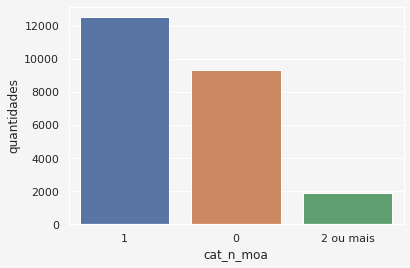

In [114]:
qnt_cat_n_moa = dados_resultados['n_moa'].value_counts().sort_values(ascending=False)
qnt_cat_n_moa = qnt_cat_n_moa.reset_index()
qnt_cat_n_moa.columns = ['cat_n_moa', 'quantidades']

quantidade_2_ou_mais = qnt_cat_n_moa.loc[2:7]['quantidades'].sum()

df_cat_2_ou_mais = pd.DataFrame([['2 ou mais', quantidade_2_ou_mais]],
                                columns=['cat_n_moa', 'quantidades'])

qnt_cat_n_moa = qnt_cat_n_moa.drop([2,3,4,5,6]).append(df_cat_2_ou_mais, ignore_index=True)

sns.barplot(data=qnt_cat_n_moa, y='quantidades', x='cat_n_moa')

In [115]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,moa_ativados,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,gsk_inhibitor,3.0,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0.0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bcr-abl_inhibitor | kit_inhibitor | pdgfr_inhi...,7.0,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0.0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,calcium_channel_blocker,3.0,True


#### Qual a relação entre experimento com MoA ativados e não ativados?

In [116]:
round(dados_resultados['ativo_moa'].value_counts(normalize=True),2)

True     0.61
False    0.39
Name: ativo_moa, dtype: float64

#### Qual o MoA mais ativados?

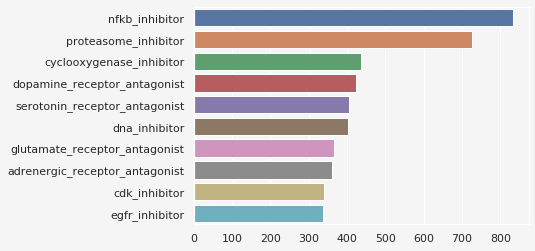

In [117]:
qnt_moa = dados_resultados.drop(['id', 'n_moa', 'ativo_moa', 'moa_ativados'],
                                axis=1
                                ).sum(axis=0).sort_values(ascending=False)[:10]

sns.barplot(y=qnt_moa.index, x=qnt_moa.values)

#### Uma droga pode ativar diversos tipos de MoA?

In [118]:
lista_drogas = list(dados['droga'].unique())

flag = False

for droga in lista_drogas:

    lista_id = list(dados[dados['droga'] == droga]['id'].values)

    moa_ativos = dados_resultados[dados_resultados['id'].isin(lista_id)]['moa_ativados'].unique()
    
    if len(moa_ativos) > 1:
        print(f'A droga {droga} ativa diferentes combinações de Moa')
        flag = True

if not flag:
    print('Drogas ativam as mesma combinações de MoA')

Drogas ativam as mesma combinações de MoA


#### Qual é a relação entre os tipos de MoA presente no dataset?

Ao examinarmos o dataset `dados_resultados.csv` podemos ver que a maioria das colunas terminam com as seguintes palavras

1. `_inhibidor`
2. `_antagonist`
3. `_agonist`

Há MoA com outras terminações. E também há moa que não tem nem estas terminações.

O primeiro passo é entender o que significa esses termos. Isso é uma área chamada de *farmacodinâmica* (estudo dos efeitos de um composto/droga no corpo)

O estudo desta área baseia-se no conceito da ligação fármaco-receptor.


Um composto pode se ligar a uma célula e pode ocorre uma resposta como consequência desta ligação. Tudo depende da chamada curva de *dose x resposta*

Muitos receptores de compostos podem ser categorizados dentro de dois estados de conformação, que estão em equilíbrio reversível entre si. Temos com grande divisão:

- **Agonista** - Um composto que, através de sua ligação a seu receptor, favorece a conformação ativa deste receptor é denominado agonista

- **Antagonista** - Um fármaco que impede a ativação do receptor pelo agonista é designado como antagonista.

**Em resumo, agonista e antagonista são duas pessoas no aniversário Guanabara disputando a última caixa de geléia de mocotó R$0,16 mais barato.O mais forte, leva.** 😅

Por exemplo:

`retinoid_receptor_agonist`, `retinoid_receptor_antagonist` competem entre si para pelo receptor de retinoides, moléculas quimicamente relacionadas com a vitamina A

In [119]:
def remove_items(lista, item):
      
    lista_nova = [i for i in lista if i != item]
  
    return lista_nova

def get_cat_moa(df, value):

    moas = df['moa_ativados']
    lista_moas = moas.split(' | ')
    acao = [j.split('_')[-1] for j in lista_moas]

    if value == 'others':

        acao = remove_items(acao, 'inhibitor')
        acao = remove_items(acao, 'agonist')
        acao = remove_items(acao, 'antagonist')

        if (len(acao) == 1) and ('' in acao):
            return 0

        if len(acao) > 0:
            return 1


    if value in acao:
        return 1
    return 0

In [120]:
dados_resultados['inibidor'] = dados_resultados.apply(get_cat_moa, value='inhibitor', axis = 1)
dados_resultados['agonista'] = dados_resultados.apply(get_cat_moa, value='agonist', axis = 1)
dados_resultados['antagonista'] = dados_resultados.apply(get_cat_moa, value='antagonist', axis = 1)
dados_resultados['outros'] = dados_resultados.apply(get_cat_moa, value='others', axis = 1)

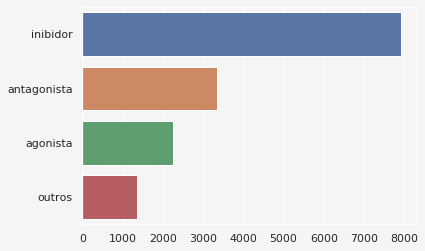

In [121]:
cat_terminacoes = dados_resultados[['inibidor', 'agonista', 'antagonista', 'outros']].sum().sort_values(ascending=False)

sns.barplot(x=cat_terminacoes.values, y=cat_terminacoes.index, orient='h', )

### Distribuição da Expressão Gênica

In [122]:
g_x = [f'g-{i}' for i in range(772)]

g_random = dados[sample(g_x, 4)]

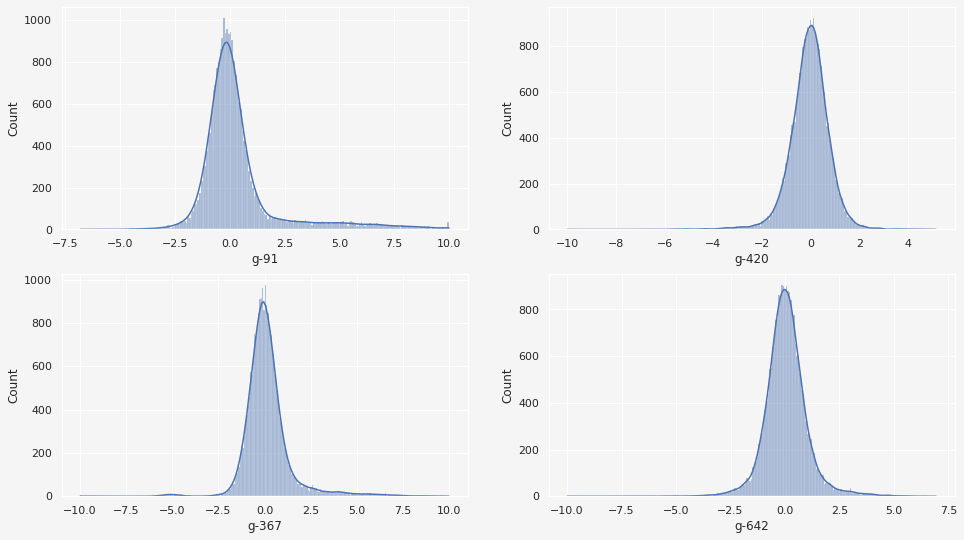

In [123]:
fig, ax = plt.subplots(2,2, figsize=(16,9))

ax = ax.ravel()

for i, df in enumerate(g_random):
    sns.histplot(data=dados[df], multiple='stack', kde=True, ax=ax[i])

### Distribuição da Viabilidade da Célula

In [124]:

c_x = [f'c-{i}' for i in range(100)]

c_random = dados[sample(c_x, 4)]

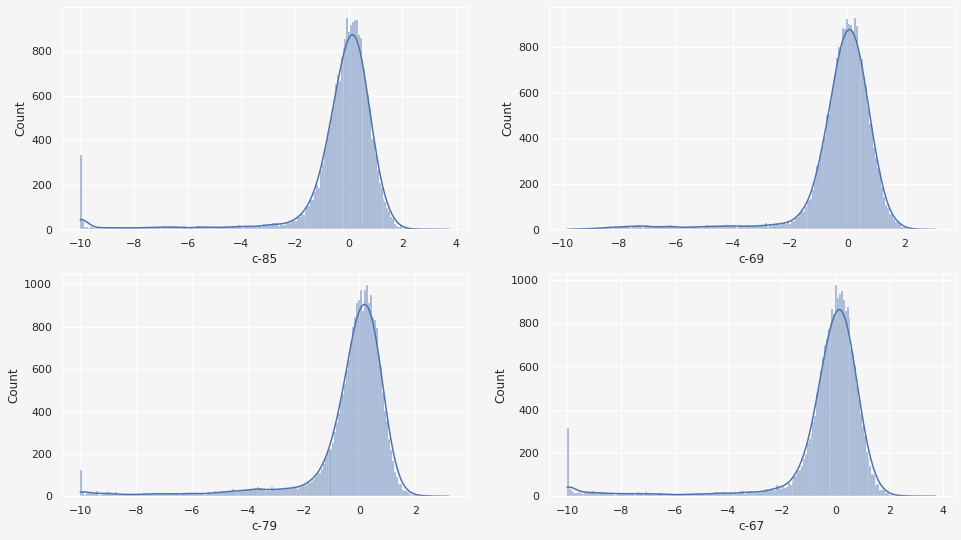

In [125]:
fig, ax = plt.subplots(2,2, figsize=(16,9))

ax = ax.ravel()

for i, df in enumerate(c_random):
    sns.histplot(data=dados[df], multiple='stack', kde=True, ax=ax[i])

Com uma análise do gráfico, podemos ver que as colunas C-X e G-X tem uma distribuição normal. Tudo nos leva a crer que a essas variáveis passaram por uma transformação que alterou sua distribuição.

Vamos ver a correlação entre elas

### Correlação entre as variáveis númericas

#### G-x's

In [126]:
corr = dados.loc[:,'g-0':'g-50'].corr()

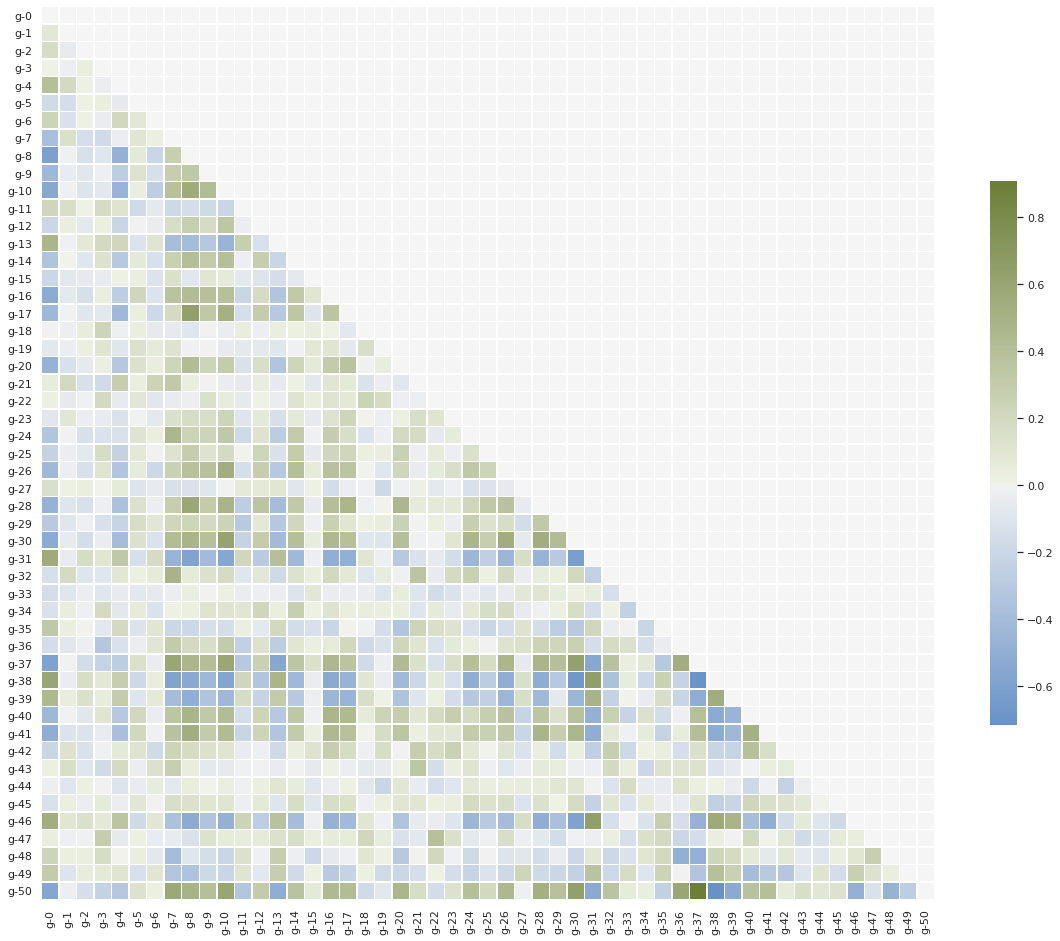

In [127]:
%matplotlib inline
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Podemos que a maioria das combinações entre os g's fica com cor de burro quando foge (correlação próxima de 0). 

O genes com a maior correlação é o g-50 com g-37

#### C-x's

In [128]:
corr = dados.loc[:,'c-0':'c-50'].corr()

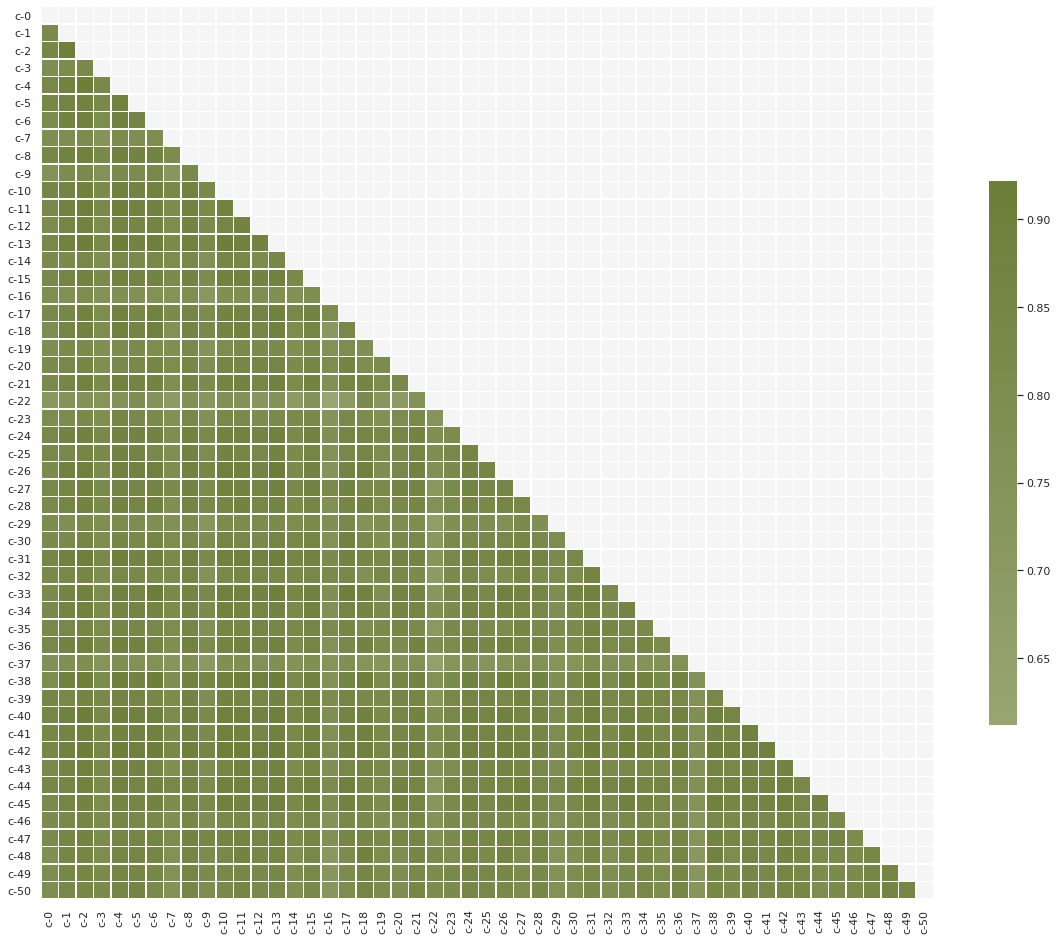

In [129]:
%matplotlib inline
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 100, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Entre as variáveis C's vemos que há um alta correlação entre elas.

*Pra eu que já não enxergo cor muito bem, então*!

## Analisando um MoA

Resolvi analisar o ativamento do MoA `serotonin_receptor_antagonist`.

Você pode se perguntar: "Porque esse MoA?"

Sendo sincero, após uma pesquisa, vi que esse é Mecanismo de Ação do Vonau Flash, um remédio jaboticaba, feito no Brasil, pela USP. A bula que diz sobre o mecanismo de ação pode ser acessada [aqui](https://consultaremedios.com.br/vonau-flash/bula)

Pela pouca pesquisa que fiz, é um remédio que leva vantagem sobre os concorrentes é que no é preciso engolir, ele dissolve na boa. Excelente opção para crianças, ou a pessoa que vos escreve, que acham ruim engolir o remédio

Outra vantagem é que ele age mais rápido que todos os outro concorrentes.


Em 2018, a patente respondia por **58% de toda a receita da USP com royalties de invenções.**

### serotonin_receptor_antagonist

Primeiro ver a quantidade de ativação deste MoA

In [130]:
dados_combinados = pd.merge(dados, dados_resultados[['id', 'serotonin_receptor_antagonist']], on='id')
dados_combinados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,serotonin_receptor_antagonist
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0

0    0.98
1    0.02
Name: serotonin_receptor_antagonist, dtype: float64


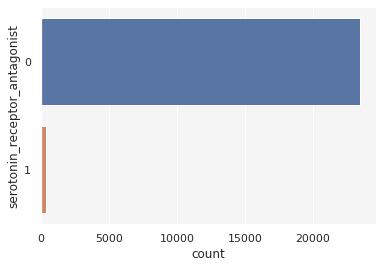

In [131]:
print(round(dados_combinados['serotonin_receptor_antagonist'].value_counts(normalize=True),2))
sns.countplot(data=dados_combinados, y='serotonin_receptor_antagonist')

Apenas 2% dos dados totais ativaram o Moa `serotonin_receptor_antagonist`.]
Se pensarmos em fazer um modelo, necessitamos de um balanceamento deste target

### Quais drogas estão associados à `serotonin_receptor_antagonist`?

In [132]:
dados_serotonin = dados_combinados[dados_combinados['serotonin_receptor_antagonist'] == 1]
dados_serotonin['droga'].nunique()

69

Há **68** drogas relacionadas à este MoA. Outra pergunta que nos permeia é...

### Quantidades por droga?

In [133]:
dados_combinados[dados_combinados['serotonin_receptor_antagonist'] == 1]['droga'].value_counts().sort_values(ascending=False)

24a3fbf37    12
42446ee76    11
d01936d7e     7
0cc68ee7c     7
5387c8eaa     7
             ..
57f986a24     2
d75904698     1
7c1e00d49     1
fb8a93a83     1
3264f3b74     1
Name: droga, Length: 69, dtype: int64

### É ativada com outras MoA?

In [134]:
id_dados_serotonin = list(dados_serotonin['id'].values)

In [135]:
moa_ativados_serotonin = dados_resultados[dados_resultados['id'].isin(id_dados_serotonin)]
moa_ativados_serotonin['moa_ativados'].nunique()

9

O `serotonin_receptor_antagonist` ativa em mais 9 combinações de MoA.

In [136]:
for combinacao in moa_ativados_serotonin['moa_ativados'].unique():
    print(combinacao)
    print()

serotonin_receptor_antagonist

dopamine_receptor_agonist | serotonin_receptor_antagonist

dopamine_receptor_antagonist | serotonin_receptor_antagonist

gaba_receptor_antagonist | serotonin_receptor_antagonist

serotonin_receptor_agonist | serotonin_receptor_antagonist

serotonin_receptor_antagonist | sodium_channel_inhibitor

adrenergic_receptor_antagonist | norepinephrine_reuptake_inhibitor | serotonin_receptor_antagonist | serotonin_reuptake_inhibitor

adrenergic_receptor_antagonist | serotonin_receptor_antagonist

adrenergic_receptor_antagonist | norepinephrine_reuptake_inhibitor | serotonin_receptor_antagonist



Estas são as combinações de MoA em que o `serotonin_receptor_antagonist` participa

# Qual droga ativa apenas o `serotonin_receptor_antagonist`?


In [137]:
lista = list(moa_ativados_serotonin[moa_ativados_serotonin['moa_ativados'] == 'serotonin_receptor_antagonist']['id'].values)

In [138]:
dados_combinados[dados_combinados['id'].isin(lista)]['droga'].unique()

array(['3f472c8fb', 'd5a1bc32c', 'e994cfd02', '3f374d199', '29140d496',
       '75ad700d0', 'a551574a7', 'd73a5cf1c', '94e531807', 'df190d2b7',
       'd1d4140f4', '5387c8eaa', '97c5016a2', '2f7e95bd8', '1d28447b9',
       'd068b0638', 'fbd797b85', 'df1d0a5a1', '7e7dfcf43', '6597149ef',
       'e09b0f9e7', 'd01936d7e', '405277073', '3b1b7319a', 'a95ca4f7d',
       'bdd03a71e', 'da0aa58bb', 'bdada81cf', '93750c9d0', '7a1707c50',
       '3ec1add16', 'a679b6ae7', '23ffb25a4', 'f177818ea', 'd401a4bc4',
       '982d5e3b2', 'd36e6ad3b', '226348f20', 'd75904698', 'd60790d36',
       '0cc68ee7c', 'cc702cc19', '9d5bf829c', '1cc61abd7', 'bc4f0ef29',
       '1087fbcdd', '36e63978b', '81756e31a', '57f986a24', 'c54fe3e44'],
      dtype=object)

Todos as drogas acime PODE ser um composto que está dentro do Vonal Flash. *Considerando que o remédio ativa apenas um MOA*

## Conclusões

Atravé do projeto apresentado pela Alura conseguimos identificar e analisar Mecanismo de Ação que está dentro do Vonal Flash

## Próximo Passos

Como Próximos Passos podemos criar um modelo que preveja quando o MoA `serotonin_receptor_antagonist` ative

## Referências

[1] [Drug Discovery](https://www.sciencedirect.com/sdfe/pdf/download/eid/3-s2.0-B9780123854711000301/first-page-pdf)

[2] https://anestesiologia.paginas.ufsc.br/files/2015/02/Farmacodinamica-texto.pdf

[3] https://pt.wikipedia.org/wiki/Retinoides

[4] https://exame.com/ciencia/mais-que-ciencia-a-gestao-do-vonau-flash-patente-milionaria-da-usp/



